In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,44903,None,None,85759.960801
2020-06-13,44904,None,None,79657.666232
2020-06-14,44905,None,None,73997.704512
2020-06-15,44906,None,None,68666.156378
2020-06-16,44907,None,None,63915.061362
...,...,...,...,...
2021-04-02,45197,None,None,60593.493041
2021-04-03,45198,None,None,57999.117089
2021-04-04,45199,None,None,55283.462238


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-06_2021-04-06-17-12.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-05_2021-04-05-17-00.pickle


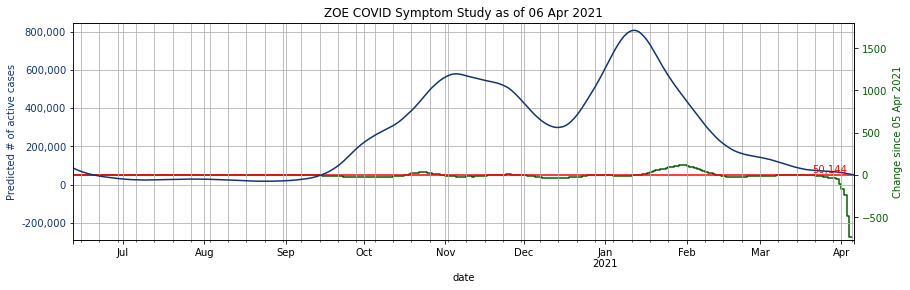

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

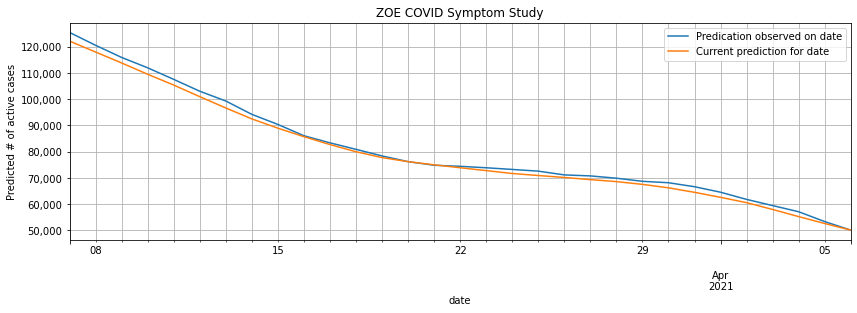

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-06_2021-04-06-17-12.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
376,South Lanarkshire,S12000029,0.686106
240,Wakefield,E08000036,0.453912
146,Staffordshire Moorlands,E07000198,0.403628
297,Falkirk,S12000014,0.398424
294,Walsall,E08000030,0.332561
273,Trafford,E08000009,0.296943
23,Bassetlaw,E07000171,0.274865
197,South Norfolk,E07000149,0.267871
192,South Holland,E07000140,0.257031
351,Hillingdon,E09000017,0.256466
